In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

import sklearn.linear_model as skl_lm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm



## Task:
Build an accurate model for predicting critical temp based on the training data, and use
your model to predict critical temp for the test data.

In [3]:
# for training data:
url1_train = 'https://raw.githubusercontent.com/dsahota-applied-data-analysis/data/main/superconductors/training.csv'
url2_train = 'https://raw.githubusercontent.com/dsahota-applied-data-analysis/data/main/superconductors/formula_training.csv'

train = pd.read_csv(url1_train) # Read-in data with pandas
formula_train = pd.read_csv(url2_train)

# for testing data:
url1_test = 'https://raw.githubusercontent.com/dsahota-applied-data-analysis/data/main/superconductors/test.csv'
url2_test = 'https://raw.githubusercontent.com/dsahota-applied-data-analysis/data/main/superconductors/formula_test.csv'

test = pd.read_csv(url1_test)
formula_test = pd.read_csv(url2_test)


Predictions will be evaluated using root mean squared error (RMSE) on the predicted value and the actual value of critical temp for the 1, 000 test superconductors

## Combine the two datasets

In [4]:
# Merge the datasets.
# Drop 'material' column because it is a qualitative variable
full_train = pd.concat([train, formula_train.drop(columns='material')], axis=1)
full_test = pd.concat([test, formula_test.drop(columns='material')], axis=1)

In [6]:
# Get training data
X_train = full_train.drop('critical_temp', axis=1)
y_train = full_train['critical_temp']

# Standardizing the features and variables

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

alphas = 10**np.linspace(10,-2,100)

In [7]:
# Split the given training data into training and validation (since imported test data isn't labeled)
X_training, X_validation, y_training, y_validation = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Models Used:
- Linear Regression
- Lasso
- Random Forest
- SVM

### Run Linear Regression

The RMSE for linear regression is: 16.658317529405196



Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals (observed - predicted)')

Text(0.5, 1.0, 'Residual PlotL Linear Regression')

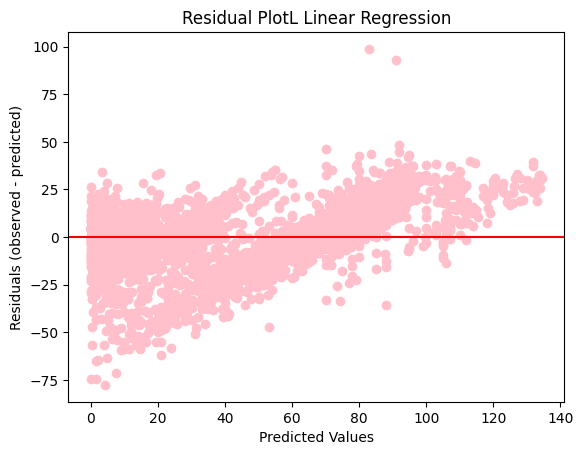

In [20]:
# Reference:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

model = skl_lm.LinearRegression().fit(scaler.fit_transform(X_training), y_training) # Initialization and fitting linear regressing
y_predicted = model.predict(X_validation) # Prediction

# Calculate RMSE
lin_reg_mse = mean_squared_error(y_validation, y_predicted)
lin_reg_rmse = sqrt(lin_reg_mse)
print(f'The RMSE for linear regression is: {lin_reg_rmse}\n')
residuals = y_validation - y_predicted

# Plotting the residuals
plt.scatter(y_validation, residuals, color='pink')
plt.axhline(0, color='red') # Actual Value
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (observed - predicted)')
plt.title('Residual PlotL Linear Regression')
plt.show()


### Lasso

In [9]:
lassocv = skl_lm.LassoCV(alphas = alphas, max_iter=10000)
lassocv.fit(X_training, y_training.values.ravel())
lasso = skl_lm.Lasso()
lasso.set_params(alpha = lassocv.alpha_)
lasso.fit(X_training, y_training.values.ravel())


LassoCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        max_iter=10000)

Lasso(alpha=0.21544346900318778)

Lasso(alpha=0.21544346900318778)

The RMSE for LASSO is: 17.46563708021977



Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residual Plot: Lasso')

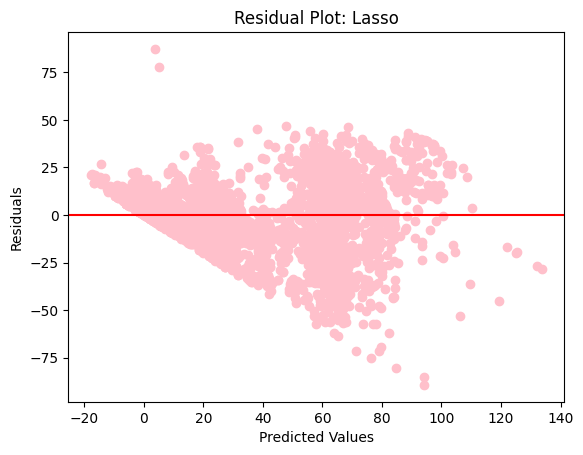

In [17]:
y_predicted = lasso.predict(scaler.transform(X_validation))
lasso_mse = mean_squared_error(y_validation, y_predicted)
lasso_rmse = sqrt(lasso_mse)
print(f'The RMSE for LASSO is: {lasso_rmse}\n')
residuals = y_validation - y_predicted

# Plot residuals
plt.scatter(y_predicted, residuals, color='pink')
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Lasso')
plt.show()


### Random Forest Regressor


The RMSE for Random Forest is: 9.849758861159797



Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residual Plot: Random Forest')

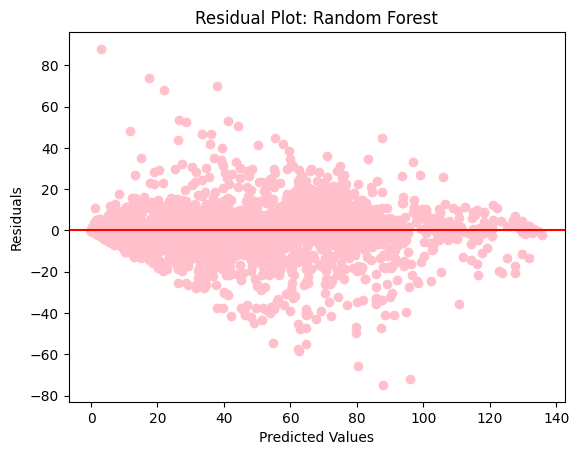

In [18]:
# Reference:
# Random Forest documentation
# https://scikit-learn.org/stable/modules/ensemble.html#forest
rf = RandomForestRegressor(n_estimators=10)
rf = rf.fit(scaler.fit_transform(X_training), y_training)

y_predicted = rf.predict(scaler.transform(X_validation))
rf_mse = mean_squared_error(y_validation, y_predicted)
rf_rmse = sqrt(rf_mse)
print(f'The RMSE for Random Forest is: {rf_rmse}\n')
residuals = y_validation - y_predicted

# Plot residuals
plt.scatter(y_predicted, residuals, color='pink')
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Random Forest')
plt.show()


In [12]:

y_test_pred = rf.predict(full_test) # Run on hidden test set (unlabeled)

# Store in a dataframe to convert to csv
predictions = pd.DataFrame({
    'critical_temp_preds': y_predicted
})

predictions.to_csv('./critical_temp_preds.csv', index=False) # Save as CSV


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [13]:
# Reference:
# SVM documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR

svm_model = svm.SVR()
svm_model = svm_model.fit(scaler.fit_transform(X_training), y_training)


The RMSE for Random Forest is: 15.602957731444876


Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residual Plot: Support Vector Machine')

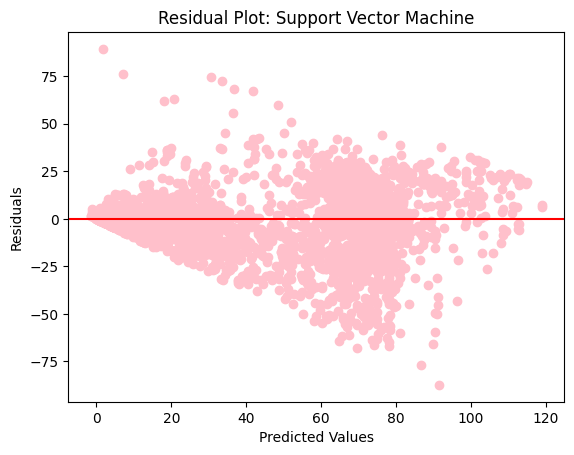

In [19]:
y_predicted = svm_model.predict(scaler.transform(X_validation))
svm_mse = mean_squared_error(y_validation, y_predicted)
svm_mse = sqrt(svm_mse)
print(f'The RMSE for Random Forest is: {svm_mse}')
residuals = y_validation - y_predicted

# Plot residuals
plt.scatter(y_predicted, residuals, color='pink')
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Support Vector Machine')
plt.show()
